In [594]:
import pandas as p
import matplotlib.pyplot as plt
import numpy as np
import time

In [595]:
#PARTE 1
data = p.read_csv("ex1data1.csv",sep=',',names=["Ingresos en 10000",
                                        "Poblacion de la ciudad en 10000"])

In [596]:
t0column = np.ones(data.shape[0])
data.insert(loc=0,column="t0",value=t0column)
x = data.loc[:,'t0':'Ingresos en 10000']
x = x.values
x = x.T

In [597]:
t = np.zeros(data.shape[1]-1)
tt = np.matrix(t)

In [598]:
y = data.loc[:,'Poblacion de la ciudad en 10000']
y = np.matrix(y)
y = y.T

In [599]:
iterations = 1500
learning_rate = 0.01

In [600]:
#Gradient Descent
def gradient_descent(x,theta,iterations,learning_rate):
    start = time.time()
    for i in range(iterations):
        h = theta.dot(x).T
        theta = theta-((learning_rate/data.shape[0])*((h-y).T.dot(x.T)))
    end = time.time()
    return theta, (end-start)

In [601]:
tt,elapsed = gradient_descent(x,tt,iterations,learning_rate)

In [602]:
h = np.matrix([np.ones(25),np.arange(25)])
h = np.array(tt.dot(h))
h = h.tolist()

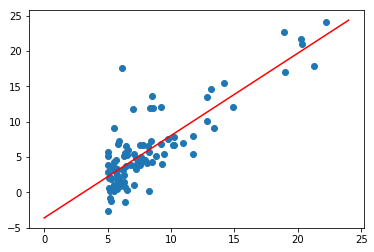

In [603]:
ydata = data.loc[:,'Poblacion de la ciudad en 10000']
xdata = data.loc[:,'Ingresos en 10000']
plt.figure()
plt.scatter(xdata,ydata)
plt.plot(h[0],'-r')


In [604]:
#PARTE 2 con gradient descent
data = p.read_csv("ex1data2.csv",sep=',',names=["Pies cuadrados","Habitaciones","Precio"])

In [605]:
x = data.loc[:,'Pies cuadrados':'Habitaciones']
x = x.values
x = x.T

In [606]:
def normalize_matrix(x):
    mean_matrix = np.matrix(list(map(np.mean,x)))
    std_matrix = np.matrix(list(map(np.std,x)))
    x_normalized = (x-mean_matrix.T)/std_matrix.T
    return x_normalized,mean_matrix,std_matrix

def normalize(x,mean_matrix,std_matrix):
    x_normalized = (x-mean_matrix.T)/std_matrix.T
    x_normalized = np.insert(arr=x_normalized,values=np.ones(x_normalized.shape[1]),obj=0,axis=0)
    return x_normalized

x_normalized,mean_matrix,std_matrix = normalize_matrix(x)
x_normalized = np.insert(arr=x_normalized,values=np.ones(x_normalized.shape[1]),obj=0,axis=0)

In [607]:
t = np.zeros(x_normalized.shape[0])
theta_ini = np.matrix(t)

In [608]:
y = data.loc[:,'Precio']
y = np.matrix(y)
y = y.T

In [609]:
#Gradient Descent times
theta,elapsed = gradient_descent(x_normalized,theta_ini,iterations,learning_rate)


In [610]:
t0column = np.ones(data.shape[0])
data.insert(loc=0,column="t0",value=t0column)
x = data.loc[:,'t0':'Habitaciones']
x = x.values

In [611]:
#PARTE 2 con ecuacion normal
inverse = np.linalg.pinv((x.T.dot(x)))
theta_normal = (inverse.dot(x.T)).dot(y)
print(theta_normal.T.dot([[1],[2040],[4]]))
a = normalize([[2040],[4]],mean_matrix,std_matrix)
print(theta.dot(np.matrix(a)))

[[338635.60808929]]
[[338717.30881357]]
